In [1]:
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def set_xaxis(ax, n_x):
    x_ticks_major= []
    x_ticks_minor= []
    x_labels_minor= []
    x_labels_major= []
    m_empty_string= ''
    for i in xrange(n_x):
        m_time_minute= 5 * (i + 1)
        m_minute_string= '{}M'.format(m_time_minute).zfill(5)
        if m_time_minute % 60 == 0:
            m_hour= m_time_minute / 60
            m_hour_string= '{}H'.format(m_hour).zfill(3)
            x_ticks_major.append(float(i))
            x_labels_major.append(m_hour_string)
        else:
            x_ticks_minor.append(float(i))
            x_labels_minor.append(m_minute_string)
    ax.set_xticks(x_ticks_minor, minor=True)
    ax.set_xticks(x_ticks_major, minor=False)
    ax.set_xticklabels(x_labels_major, minor=False, rotation=65)
    ax.grid(True, which='major')

In [ ]:
# clusters= ["cluster_{}".format(i) for i in xrange(0,7)]
# partitions= ['weekday', 'weekend']
# for p in partitions:
#     for c in clusters:
#         df= pd.read_csv('./data/kmeans/{}/total_flow_{}_label_stats.kmeans_2014_{}.csv'.format(p, c, p), header= None)
#         m_mean_vector= df.iloc[0].values
#         m_std_vector= np.sqrt(df.iloc[1]).values
#         #
#         msub_vec= m_mean_vector - m_std_vector
#         madd_vec= m_mean_vector + m_std_vector
#         #
#         fig, ax= plt.subplots(figsize=(16,8))
#         ax.plot(msub_vec, c='green', ls='dashed', lw=2.0, label='std')
#         ax.plot(m_mean_vector, c='blue', lw=2.0, label='mean')
#         ax.plot(madd_vec, c='green', ls='dashed', lw=2.0)
#         ax.legend()
#         #
#         m_title= '2014_{}_{}_mean+std'.format(p, c)
#         ax.set_title(m_title)
#         #
#         set_xaxis(ax, len(m_mean_vector))

In [19]:
a_df= pd.read_csv('./data/kmeans/weekday/total_flow_cluster_fractions.kmeans_2014_weekday.csv', header= None).sort(0)
a_df.columns= ['cluster_id', 'fraction']
a_df.set_index('cluster_id', inplace=True)
a_df

,fraction
cluster_id,
0,0.138323
1,0.106964
2,0.177050
3,0.182239
4,0.128036
5,0.205793
6,0.061595


In [20]:
b_df= pd.read_csv('./data/kmeans/weekend/total_flow_cluster_fractions.kmeans_2014_weekend.csv', header= None).sort(0)
b_df.columns= ['cluster_id', 'fraction']
b_df.set_index('cluster_id', inplace=True)
b_df

,fraction
cluster_id,
0,0.194593
1,0.200148
2,0.151831
3,0.196586
4,0.102478
5,0.124676
6,0.029689


In [22]:
f_value= a_df.iloc[0]
f_value

fraction    0.138323
Name: 0.0, dtype: float64

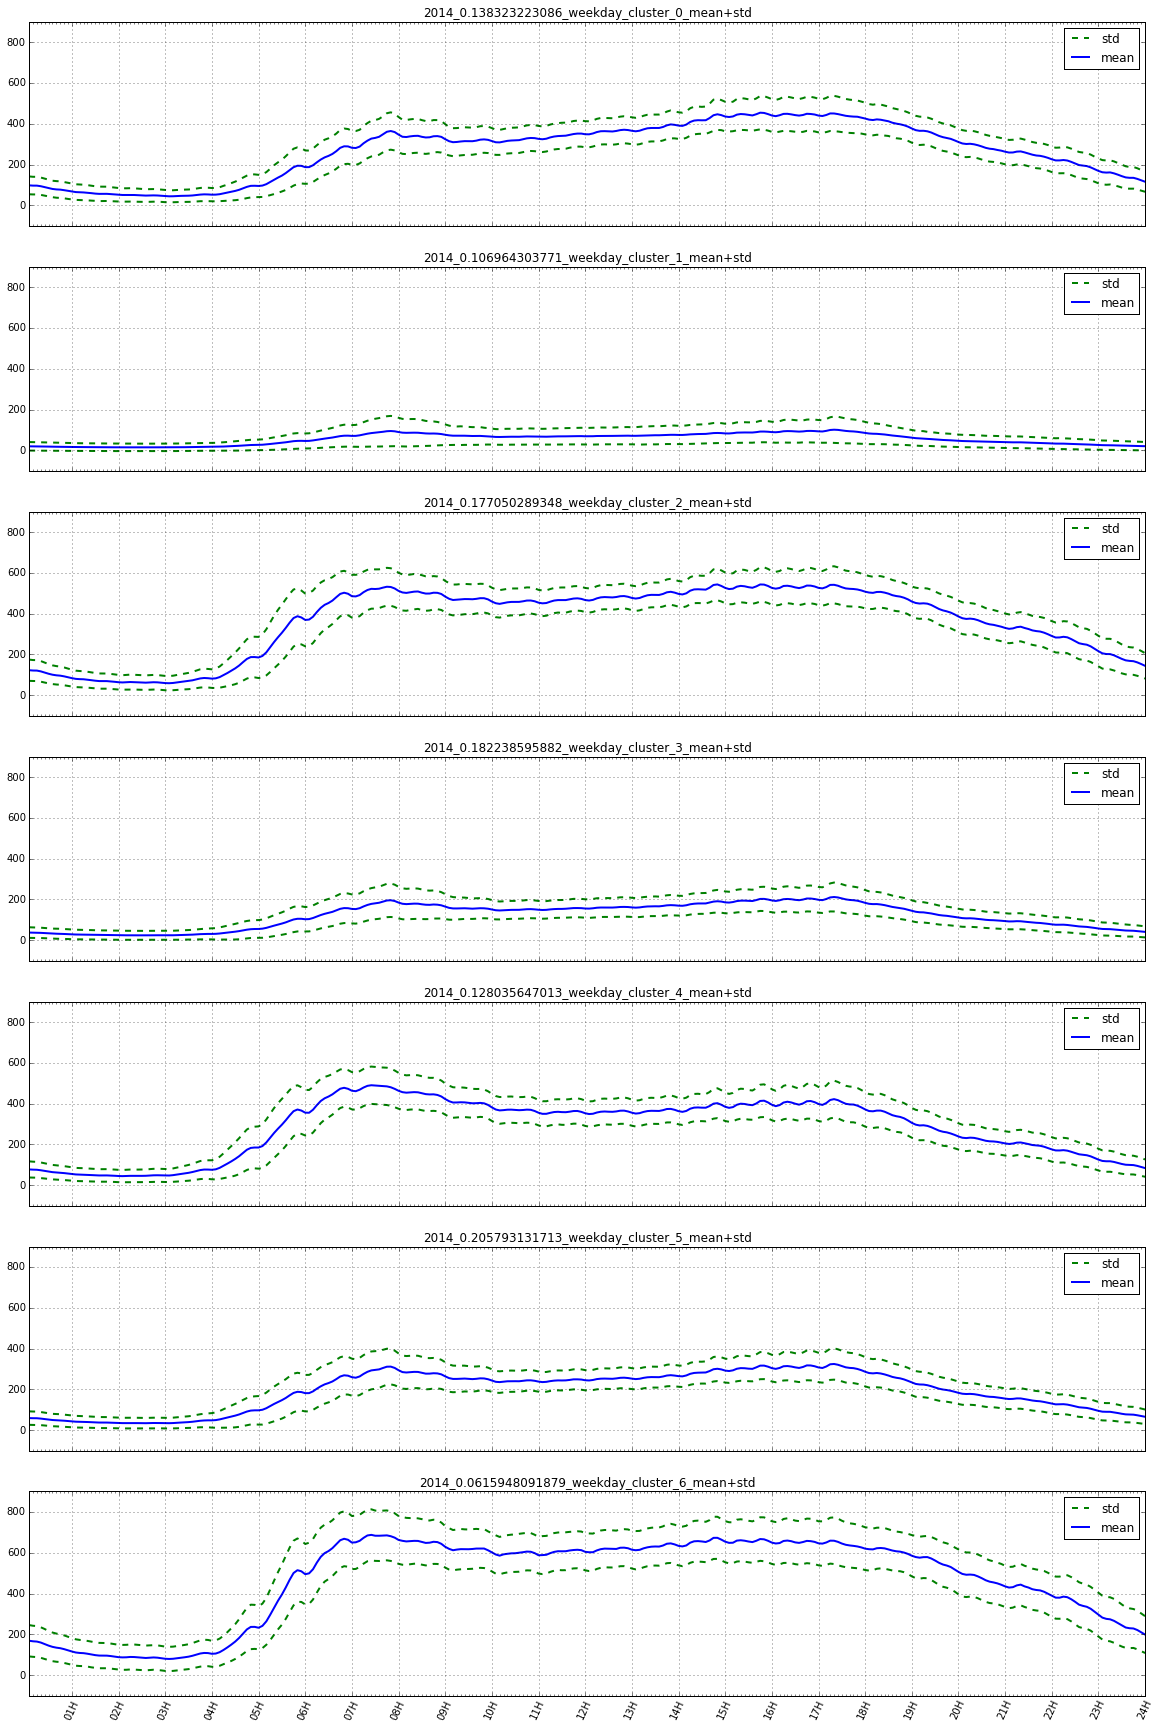

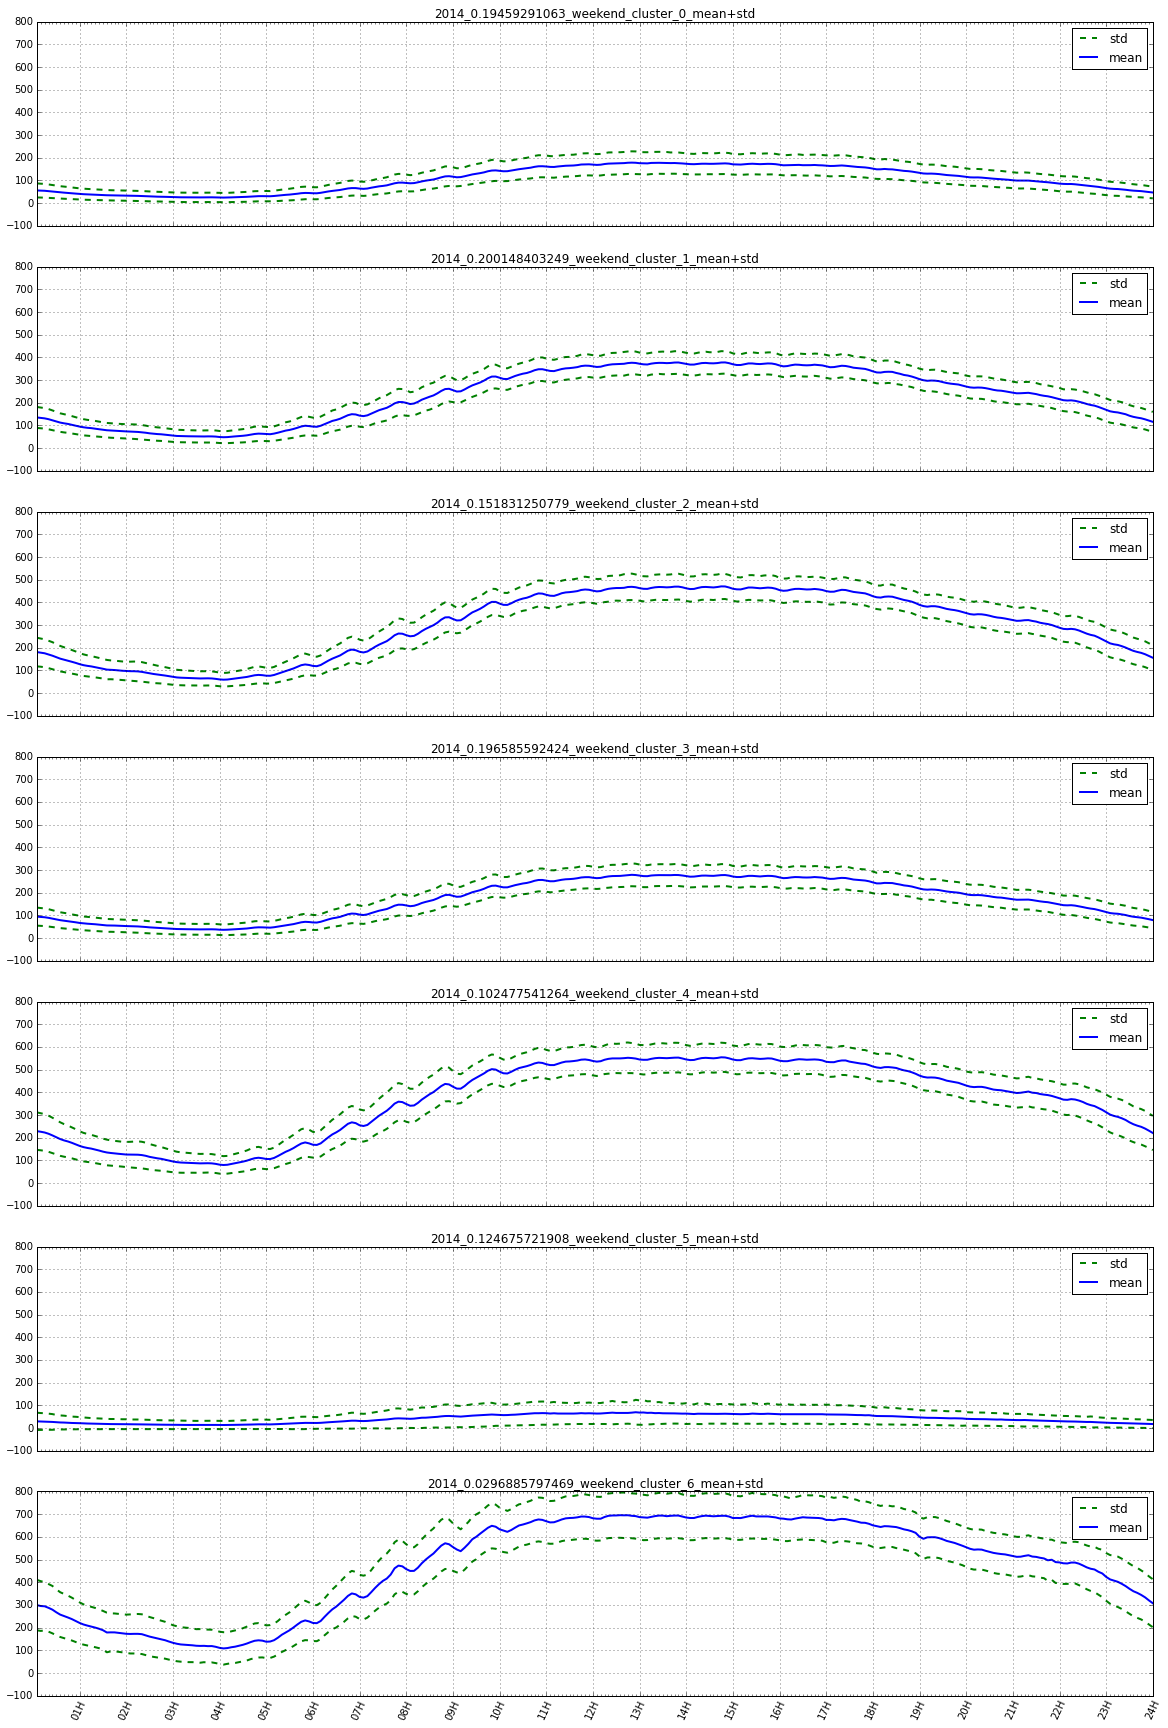

In [25]:
rows= 7
columns= 2
clusters= ["cluster_{}".format(i) for i in xrange(0,rows)]
partitions= ['weekday', 'weekend']

figsize= (20, 30)

fig, axes = plt.subplots(nrows=rows, ncols=1, sharex=True, sharey=True, figsize=figsize)
for row in xrange(0, rows):
    c= clusters[row]
    p= partitions[0]
    f_value= a_df.iloc[row].values[0]
    df= pd.read_csv('./data/kmeans/{}/total_flow_{}_label_stats.kmeans_2014_{}.csv'.format(p, c, p), header= None)
    m_mean_vector= df.iloc[0].values
    m_std_vector= np.sqrt(df.iloc[1]).values
    #
    msub_vec= m_mean_vector - m_std_vector
    madd_vec= m_mean_vector + m_std_vector
    #
    ax= axes[row]
    ax.plot(msub_vec, c='green', ls='dashed', lw=2.0, label='std')
    ax.plot(m_mean_vector, c='blue', lw=2.0, label='mean')
    ax.plot(madd_vec, c='green', ls='dashed', lw=2.0)
    ax.legend()
    #
    m_title= '2014_{}_{}_{}_mean+std'.format(f_value, p, c)
    ax.set_title(m_title)
    #
    set_xaxis(ax, len(m_mean_vector))
fig.savefig('2014_weekday_kmeans.png')

fig, axes = plt.subplots(nrows=rows, ncols=1, sharex=True, sharey=True, figsize=figsize)
for row in xrange(0, rows):
    c= clusters[row]
    p= partitions[1]
    f_value= b_df.iloc[row].values[0]
    df= pd.read_csv('./data/kmeans/{}/total_flow_{}_label_stats.kmeans_2014_{}.csv'.format(p, c, p), header= None)
    m_mean_vector= df.iloc[0].values
    m_std_vector= np.sqrt(df.iloc[1]).values
    #
    msub_vec= m_mean_vector - m_std_vector
    madd_vec= m_mean_vector + m_std_vector
    #
    ax= axes[row]
    ax.plot(msub_vec, c='green', ls='dashed', lw=2.0, label='std')
    ax.plot(m_mean_vector, c='blue', lw=2.0, label='mean')
    ax.plot(madd_vec, c='green', ls='dashed', lw=2.0)
    ax.legend()
    #
    m_title= '2014_{}_{}_{}_mean+std'.format(f_value, p, c)
    ax.set_title(m_title)
    #
    set_xaxis(ax, len(m_mean_vector))
fig.savefig('2014_weekend_kmeans.png')